# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

## **Load bioactivity data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Butyrylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active
...,...,...,...,...
3847,CHEMBL5270598,O=C1CC2CCc3ccsc3C2=NN1CN1CCN(Cc2ccccc2)CC1,5580.0,intermediate
3848,CHEMBL5285633,O=C1CC2CCCc3ccsc3C2=NN1CCCCN1CCN(Cc2ccccc2)CC1,4130.0,intermediate
3849,CHEMBL5283494,O=C1CC2CCc3ccsc3C2=NN1CCN1CCN(Cc2ccccc2)CC1,5110.0,intermediate
3850,CHEMBL5283557,O=C1CC2CCc3ccsc3C2=NN1Cc1ccc(CN2CCN(Cc3ccccc3)...,9700.0,intermediate


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,920.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,900.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,1000.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,200.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
3847,CHEMBL5270598,5580.0,intermediate,O=C1CC2CCc3ccsc3C2=NN1CN1CCN(Cc2ccccc2)CC1
3848,CHEMBL5285633,4130.0,intermediate,O=C1CC2CCCc3ccsc3C2=NN1CCCCN1CCN(Cc2ccccc2)CC1
3849,CHEMBL5283494,5110.0,intermediate,O=C1CC2CCc3ccsc3C2=NN1CCN1CCN(Cc2ccccc2)CC1
3850,CHEMBL5283557,9700.0,intermediate,O=C1CC2CCc3ccsc3C2=NN1Cc1ccc(CN2CCN(Cc3ccccc3)...


In [6]:
import sys
print(sys.executable)


c:\Users\sumee\anaconda3\python.exe


In [7]:
pip install rdkit-pypi


Note: you may need to restart the kernel to use updated packages.


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [8]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

print("RDKit imported successfully!")


RDKit imported successfully!


In [27]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [28]:

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [29]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
3847,394.544,3.0222,0.0,5.0
3848,450.652,4.2350,0.0,5.0
3849,408.571,3.0647,0.0,5.0
3850,484.669,4.7649,0.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [30]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
3847,394.544,3.0222,0.0,5.0
3848,450.652,4.2350,0.0,5.0
3849,408.571,3.0647,0.0,5.0
3850,484.669,4.7649,0.0,5.0


In [31]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active
...,...,...,...,...
3847,CHEMBL5270598,O=C1CC2CCc3ccsc3C2=NN1CN1CCN(Cc2ccccc2)CC1,5580.0,intermediate
3848,CHEMBL5285633,O=C1CC2CCCc3ccsc3C2=NN1CCCCN1CCN(Cc2ccccc2)CC1,4130.0,intermediate
3849,CHEMBL5283494,O=C1CC2CCc3ccsc3C2=NN1CCN1CCN(Cc2ccccc2)CC1,5110.0,intermediate
3850,CHEMBL5283557,O=C1CC2CCc3ccsc3C2=NN1Cc1ccc(CN2CCN(Cc3ccccc3)...,9700.0,intermediate


Now, let's combine the 2 DataFrame

In [32]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [33]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
3847,CHEMBL5270598,O=C1CC2CCc3ccsc3C2=NN1CN1CCN(Cc2ccccc2)CC1,5580.0,intermediate,394.544,3.0222,0.0,5.0
3848,CHEMBL5285633,O=C1CC2CCCc3ccsc3C2=NN1CCCCN1CCN(Cc2ccccc2)CC1,4130.0,intermediate,450.652,4.2350,0.0,5.0
3849,CHEMBL5283494,O=C1CC2CCc3ccsc3C2=NN1CCN1CCN(Cc2ccccc2)CC1,5110.0,intermediate,408.571,3.0647,0.0,5.0
3850,CHEMBL5283557,O=C1CC2CCc3ccsc3C2=NN1Cc1ccc(CN2CCN(Cc3ccccc3)...,9700.0,intermediate,484.669,4.7649,0.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [56]:
def pIC50(input):
    pIC50 = []
    
    for molar in input['standard_value_norm']:
        # Check if molar is zero or negative
        if molar > 0:
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(np.nan)  # or use a small positive number if you prefer

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Use 'axis=1' for clarity

    return x


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [57]:
df_combined.standard_value.describe()

count    3.852000e+03
mean     5.305559e+12
std      3.006245e+14
min      0.000000e+00
25%      2.060000e+02
50%      3.500000e+03
75%      2.172500e+04
max      1.862087e+16
Name: standard_value, dtype: float64

In [58]:
-np.log10( (10**-9)* 100000000 )

1.0

In [59]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [60]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [61]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,920.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,900.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,1000.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,200.0
...,...,...,...,...,...,...,...,...
3847,CHEMBL5270598,O=C1CC2CCc3ccsc3C2=NN1CN1CCN(Cc2ccccc2)CC1,intermediate,394.544,3.0222,0.0,5.0,5580.0
3848,CHEMBL5285633,O=C1CC2CCCc3ccsc3C2=NN1CCCCN1CCN(Cc2ccccc2)CC1,intermediate,450.652,4.2350,0.0,5.0,4130.0
3849,CHEMBL5283494,O=C1CC2CCc3ccsc3C2=NN1CCN1CCN(Cc2ccccc2)CC1,intermediate,408.571,3.0647,0.0,5.0,5110.0
3850,CHEMBL5283557,O=C1CC2CCc3ccsc3C2=NN1Cc1ccc(CN2CCN(Cc3ccccc3)...,intermediate,484.669,4.7649,0.0,5.0,9700.0


In [62]:
df_norm.standard_value_norm.describe()

count    3.852000e+03
mean     2.250921e+05
std      4.082546e+06
min      0.000000e+00
25%      2.060000e+02
50%      3.500000e+03
75%      2.172500e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [63]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,-2.963788
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,-2.954243
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,-4.698970
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,-3.000000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,-2.301030
...,...,...,...,...,...,...,...,...
3847,CHEMBL5270598,O=C1CC2CCc3ccsc3C2=NN1CN1CCN(Cc2ccccc2)CC1,intermediate,394.544,3.0222,0.0,5.0,-3.746634
3848,CHEMBL5285633,O=C1CC2CCCc3ccsc3C2=NN1CCCCN1CCN(Cc2ccccc2)CC1,intermediate,450.652,4.2350,0.0,5.0,-3.615950
3849,CHEMBL5283494,O=C1CC2CCc3ccsc3C2=NN1CCN1CCN(Cc2ccccc2)CC1,intermediate,408.571,3.0647,0.0,5.0,-3.708421
3850,CHEMBL5283557,O=C1CC2CCc3ccsc3C2=NN1Cc1ccc(CN2CCN(Cc3ccccc3)...,intermediate,484.669,4.7649,0.0,5.0,-3.986772


In [64]:
df_final.pIC50.describe()

count    3851.000000
mean       -3.251187
std         1.531877
min        -8.000000
25%        -4.337259
50%        -3.544068
75%        -2.313867
max         5.000000
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [65]:
df_final.to_csv('Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [66]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,-2.963788
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,-2.954243
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,-4.698970
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,-3.000000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,-2.301030
...,...,...,...,...,...,...,...,...
3835,CHEMBL5282182,CCC(=O)CNC(=O)Nc1nc2ccc(-c3oc4c(OC)c(O)c(O)c(O...,active,515.500,3.30430,5.0,11.0,0.494850
3836,CHEMBL5286597,CCN(CC)CCCCOc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1,inactive,397.471,4.37200,2.0,6.0,-5.000000
3838,CHEMBL5286183,Cc1ccc(NCC[C@@H]2CCCN3CCCC[C@H]23)c2c(=O)c3ccc...,active,406.595,5.78962,1.0,4.0,-2.662758
3839,CHEMBL5290033,Cc1ccc(NCC[C@@H]2CCCN3CCCC[C@H]23)c2c(=O)c3ccc...,active,390.527,5.32112,1.0,4.0,-2.568202


Let's write this to CSV file.

In [67]:
df_2class.to_csv('Butyrylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [68]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

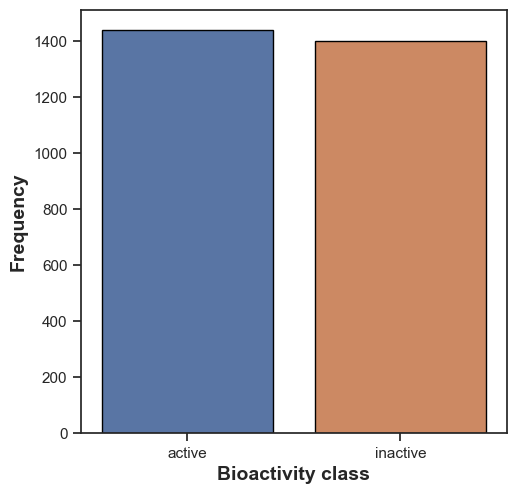

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

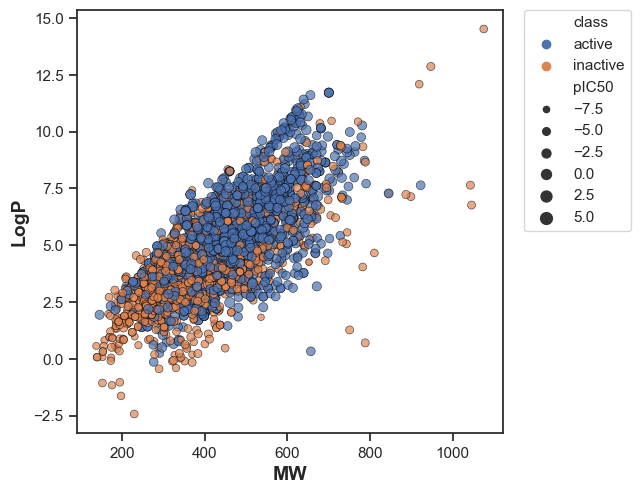

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

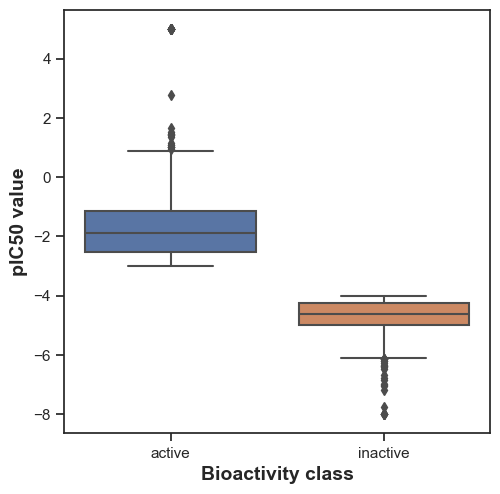

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [75]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [76]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### **MW**

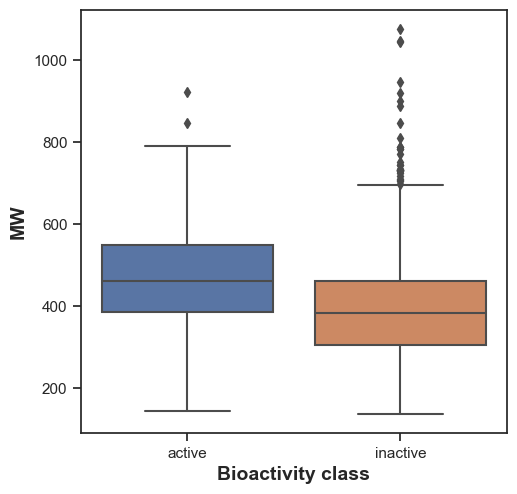

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [78]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1376165.5,1.217076e-64,0.05,Different distribution (reject H0)


#### **LogP**

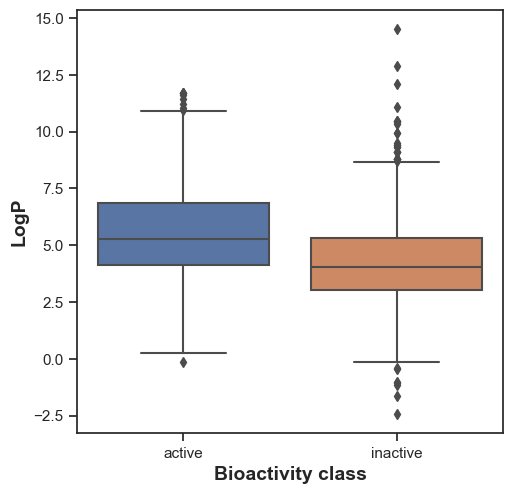

In [79]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [80]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1368582.5,4.277713e-62,0.05,Different distribution (reject H0)


#### **NumHDonors**

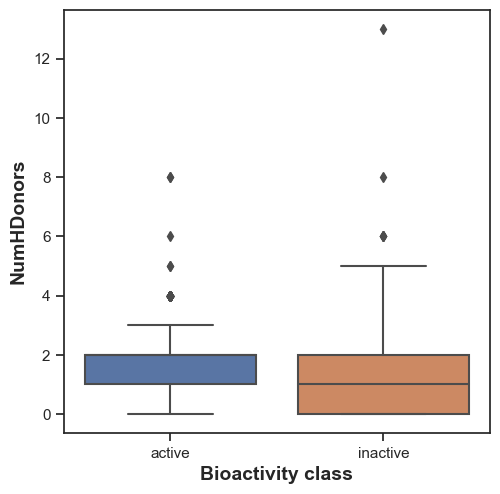

In [81]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [82]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1373592.0,1.202007e-68,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

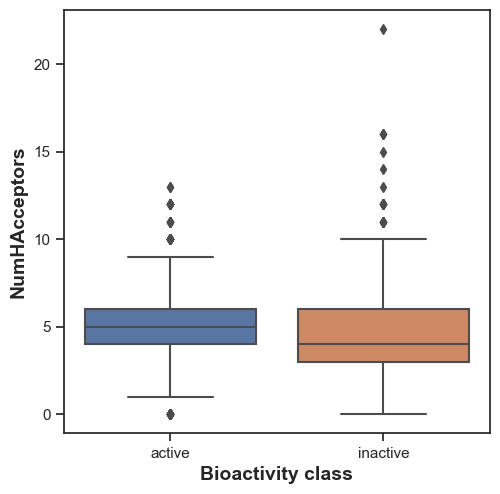

In [83]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [84]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1089278.5,0.000109,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.